---
title: "Black-Litterman Allocation Model"
author: "WANG Hengze"
format:
  pdf:
    documentclass: report
    toc: true
    toc-title: "Table des matières"
    number-sections: false
    pdf-engine: xelatex
    include-in-header: 
      text: |
        \usepackage{fancyhdr}
        \pagestyle{fancy}
        \fancyhf{}
        \lhead{B-L Model}
        \rhead{\leftmark}
        \cfoot{\thepage}

        \usepackage{amsmath,amssymb,graphicx,booktabs,longtable,float,hyperref}
        \usepackage{fvextra}  % ✅ 用于改进代码块排版
        \DefineVerbatimEnvironment{Highlighting}{Verbatim}
          {breaklines,commandchars=\\\{\},fontsize=\small,frame=single,rulecolor=\color{gray},xleftmargin=1em}
    mainfont: "Palatino"
    fontsize: 11pt
    geometry: margin=1in
execute:
  notebook: Projet_Black-Litterman.ipynb
---




# Introduction

La gestion d'un portefeuille d'actifs financiers constitue un enjeu central pour les investisseurs, qu'ils soient individuels ou institutionnels. Un portefeuille est une combinaison stratégique d'actifs financiers diversifiés, tels que des actions, des obligations, des matières premières ou d'autres types d'investissements. L'objectif principal d'une telle composition est de maximiser le rendement tout en minimisant le risque, conformément au profil de risque et aux objectifs de l'investisseur.

Le choix des actifs et, plus particulièrement, la pondération qui leur est attribuée au sein du portefeuille, influence directement sa performance et son niveau de risque. Cependant, les modèles classiques de gestion de portefeuille, comme le modèle de Markowitz, rencontrent souvent des limites pratiques, notamment en raison de l'instabilité des poids optimaux résultant d'estimations imprécises des paramètres nécessaires (rendements attendus et matrice de covariance).

Face à ces défis, le modèle Black-Litterman, développé par Fischer Black et Robert Litterman au début des années 1990, apporte une réponse innovante. En combinant les attentes implicites du marché avec les opinions subjectives de l'investisseur selon une approche bayésienne, ce modèle offre une solution plus robuste et réaliste pour la gestion d’actifs.

L’objectif de ce projet est double : d'une part, présenter une dérivation théorique complète du modèle Black-Litterman, et d'autre part, implémenter numériquement ce modèle en utilisant Python, accompagné d'une analyse comparative détaillée avec d'autres approches classiques, comme celle de Markowitz. Ce rapport, rédigé à l'aide de Quarto dans Jupyter Notebook, permettra de mieux comprendre les forces et les limites du modèle Black-Litterman, ainsi que ses applications pratiques dans un contexte d'investissement réel.



# 2. Le Modèle de Markowitz : Théorie et Limites

## 2.1 Fondements du modèle

Le modèle de Markowitz, également appelé modèle de la moyenne-variance, a été introduit par Harry Markowitz en 1952. Il constitue la pierre angulaire de la théorie moderne du portefeuille. L'idée centrale repose sur l'équilibre entre rendement espéré et risque associé à un portefeuille, ce dernier étant fortement influencé par la corrélation entre les actifs.

Formellement, le rendement attendu d’un portefeuille $R_p$ est exprimé comme la combinaison pondérée des rendements espérés individuels des actifs. En notant $\mu \in \mathbb{R}^n$ le vecteur des rendements espérés des actifs et $\mathbf{w} \in \mathbb{R}^n$ le vecteur des poids attribués à chaque actif dans le portefeuille, nous obtenons :
$$\mathbb{E}[R_p] = \mathbf{w}^\top \mu$$

La variance du portefeuille, quantifiant le risque associé, dépend de la matrice de covariance $\Sigma \in \mathbb{R}^{n \times n}$ des rendements des actifs. Elle est définie par :
$$\text{Var}(R_p) = \mathbf{w}^\top \Sigma \mathbf{w}$$

Ces formules constituent le socle mathématique des décisions d’investissement, où l’investisseur rationnel vise à minimiser le risque pour un rendement fixé, à maximiser le rendement pour un risque déterminé, ou à maximiser le ratio de Sharpe :
$$\text{Sharpe}(\mathbf{w}) = \frac{\mathbf{w}^\top \mu - r_f}{\sqrt{\mathbf{w}^\top \Sigma \mathbf{w}}}$$
où $r_f$ représente le taux de rendement sans risque.

## 2.2 Risque et dominance selon Markowitz

Selon Markowitz, l'investisseur rationnel présente une aversion au risque, exprimée par deux hypothèses fondamentales :

- Si deux portefeuilles ont un rendement espéré égal, l'investisseur préférera toujours le portefeuille ayant le risque (variance) le plus faible.
- Si deux portefeuilles ont un niveau de risque égal, l'investisseur préférera toujours le portefeuille ayant le rendement espéré le plus élevé.

Ces principes définissent clairement les notions de dominance dans le cadre de la gestion de portefeuille.

## 2.3 Résultats clés : frontière efficiente

L’ensemble des portefeuilles répondant aux critères d’optimalité forme la **frontière efficiente**. Celle-ci représente toutes les combinaisons optimales possibles entre rendement et risque, surpassant toutes les autres configurations en termes de compromis rendement-risque.

Graphiquement, la frontière efficiente est une courbe convexe, souvent appelée « courbe moyenne-variance », représentée dans un espace ayant pour axes la volatilité (écart-type) et le rendement espéré.

## 2.4 Limites pratiques du modèle de Markowitz

Malgré sa robustesse théorique, le modèle présente plusieurs limites notables en pratique :

Premièrement, une légère modification dans les estimations des rendements espérés ou de la matrice de covariance peut entraîner une instabilité importante des poids optimaux, ce qui fragilise les décisions d’investissement.

Deuxièmement, le modèle suppose implicitement que les rendements suivent une distribution normale, une hypothèse rarement validée empiriquement, en raison des phénomènes fréquents d'asymétrie et de queues épaisses observées sur les marchés financiers.

Troisièmement, les estimations réalisées sur des périodes historiques courtes sont sujettes à des erreurs statistiques significatives, compromettant la fiabilité des résultats obtenus.

Enfin, le modèle original ne tient pas compte des vues ou des convictions personnelles des investisseurs, limitant ainsi sa capacité à s’adapter efficacement aux anticipations futures ou aux changements contextuels.

Ces contraintes opérationnelles justifient l’émergence de modèles alternatifs, tel que le modèle Black-Litterman, conçu spécifiquement pour intégrer les opinions subjectives aux données historiques objectives.




# 3. Le Modèle de Black-Litterman : Théorie et Avantages

## 3.1 Introduction et motivations

Le modèle Black-Litterman, développé par Fischer Black et Robert Litterman au début des années 1990, vise à pallier certaines limites pratiques du modèle de Markowitz, notamment l’instabilité des poids optimaux et l’absence d'intégration explicite des vues subjectives des investisseurs. En adoptant une approche bayésienne, ce modèle intègre efficacement les estimations implicites du marché et les convictions personnelles des investisseurs, offrant ainsi une méthode robuste et intuitive pour déterminer les allocations d'actifs optimales.

## 3.2 Cadre théorique du modèle

### 3.2.1 Estimation des rendements d'équilibre implicites du marché

Dans le cadre du modèle Black-Litterman, les rendements d'équilibre implicites (anticipés par le marché) sont initialement estimés sous l’hypothèse que les poids observés du marché sont optimaux compte tenu d'un certain niveau d’aversion au risque. Formellement, le vecteur des rendements implicites du marché $\Pi$ est obtenu par :
$$\Pi = \delta \Sigma w_{mkt}$$
où $\delta$ est le coefficient d’aversion au risque du marché, $\Sigma$ est la matrice de covariance des actifs et $w_{mkt}$ le vecteur des poids observés sur le marché.

### 3.2.2 Intégration des vues subjectives

Le modèle permet aux investisseurs d'intégrer explicitement leurs convictions subjectives sur les performances futures des actifs. Ces vues peuvent concerner des rendements absolus (par exemple, l'investisseur estime que l'actif A aura un rendement de 5 %) ou des rendements relatifs (par exemple, l'actif A surpassera l'actif B de 3 %). Formellement, les vues sont exprimées sous la forme :
$$Q = P \mu + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, \Omega)$$
où $Q$ représente le vecteur des vues, $P$ une matrice définissant les actifs concernés par ces vues, et $\Omega$ la matrice reflétant le degré d'incertitude associé à ces vues.

### 3.2.3 Combinaison bayésienne : rendements attendus postérieurs

L'intégration des vues subjectives avec les estimations implicites du marché s'effectue par une procédure bayésienne permettant de calculer des rendements attendus dits « postérieurs ». Formellement, les rendements attendus postérieurs $\mu_{BL}$ sont calculés selon :
$$\mu_{BL} = \left[(\tau \Sigma)^{-1} + P^\top \Omega^{-1} P\right]^{-1} \left[(\tau \Sigma)^{-1}\Pi + P^\top \Omega^{-1}Q\right]$$
où $\tau$ représente un paramètre d'incertitude lié aux estimations initiales.

### 3.2.4 Détermination finale des poids du portefeuille

Enfin, les rendements attendus postérieurs sont utilisés pour déterminer les poids optimaux du portefeuille selon la méthode traditionnelle de la moyenne-variance. Formellement, les poids optimaux $w_{BL}$ du portefeuille sont obtenus par :

$$w_{BL} = \frac{1}{\delta} \Sigma^{-1} \mu_{BL}$$

Cette procédure permet d'obtenir une allocation d'actifs robuste et adaptée aux anticipations spécifiques des investisseurs, tout en bénéficiant de la stabilité accrue apportée par le cadre bayésien.

## 3.3 Avantages du modèle Black-Litterman

Le modèle Black-Litterman présente plusieurs avantages décisifs comparativement au modèle traditionnel de Markowitz. En intégrant directement les convictions subjectives des investisseurs aux estimations objectives du marché, il permet d'obtenir des poids de portefeuille plus stables et moins sensibles aux erreurs d'estimation. Sa flexibilité intrinsèque favorise une adaptation rapide aux évolutions contextuelles du marché et aux modifications éventuelles des vues des investisseurs. Enfin, grâce à sa transparence et à son approche intuitive, le modèle Black-Litterman améliore sensiblement l'interprétabilité des résultats obtenus, facilitant ainsi les prises de décision en gestion d'actifs.



# 4. Mise en œuvre pratique du modèle Black-Litterman

## 4.1 Sélection et préparation des données

Pour mettre en œuvre le modèle Black-Litterman, il est nécessaire de commencer par sélectionner un ensemble pertinent d'actifs financiers. Généralement, les données historiques des prix ajustés à la clôture des actifs sélectionnés sont récupérées sur des plateformes financières, telles que Yahoo Finance, en utilisant des outils programmatiques comme Python et la bibliothèque `yfinance`. Ces données permettent d'estimer les rendements historiques et la matrice de covariance des actifs, éléments indispensables pour le modèle.

## 4.2 Calcul des rendements historiques et de la matrice de covariance

À partir des prix historiques, les rendements attendus des actifs sont généralement estimés en calculant la moyenne historique des rendements journaliers annualisés. La matrice de covariance est obtenue en calculant les covariances historiques des rendements journaliers, également annualisées. Ces calculs peuvent être réalisés efficacement avec les modules spécifiques de la bibliothèque `PyPortfolioOpt` : `expected_returns` et `risk_models`.

## 4.3 Estimation des rendements d'équilibre du marché

L’estimation initiale des rendements implicites du marché (rendements d'équilibre) est calculée en tenant compte des poids de marché des actifs, du niveau d'aversion au risque observé sur le marché, ainsi que de la matrice de covariance précédemment déterminée. Le coefficient d'aversion au risque du marché est généralement estimé à partir des rendements historiques du marché global, comme l’indice S&P 500.

## 4.4 Incorporation des vues subjectives

La spécificité du modèle Black-Litterman réside dans l'intégration des vues subjectives de l’investisseur sur certains actifs ou sur des relations entre actifs. Ces vues sont quantifiées par un vecteur de rendement attendu pour chaque conviction ainsi qu'une matrice associée définissant les actifs impliqués. De plus, une matrice de confiance est utilisée pour représenter le niveau d'incertitude lié à ces convictions, généralement estimée par la méthode d’Idzorek.

## 4.5 Optimisation du portefeuille

Les rendements attendus postérieurs, résultant de la combinaison des estimations du marché et des vues subjectives via le modèle Black-Litterman, servent de base pour optimiser la répartition du portefeuille selon les principes du modèle de Markowitz. L’objectif typique est la maximisation du ratio de Sharpe, ce qui implique de déterminer les poids optimaux qui maximisent le rendement ajusté du risque.

## 4.6 Évaluation et comparaison des résultats

Enfin, la performance du portefeuille optimisé selon le modèle Black-Litterman peut être évaluée à l'aide d'outils d'analyse de performance financière, tels que la bibliothèque `quantstats`. Différents indicateurs, comme le rendement cumulé, la volatilité annualisée, le ratio de Sharpe, la perte maximale (drawdown) et la corrélation avec un benchmark pertinent (tel que l’indice S&P 500), sont utilisés pour juger de la pertinence et de l'efficacité de l'allocation déterminée par le modèle Black-Litterman.

Cette approche complète permet non seulement d'appliquer rigoureusement le modèle Black-Litterman, mais également d’en apprécier les avantages pratiques en termes de stabilité et de performance dans un contexte réel d'investissement.



[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


Premières lignes des prix:
Ticker            AAPL         AMD         DIS        TSLA
Date                                                      
2022-01-03  178.879929  150.240005  154.847061  399.926666
2022-01-04  176.609650  144.419998  153.829636  383.196655
2022-01-05  171.911850  136.149994  153.296249  362.706665
2022-01-06  169.042084  136.229996  154.985352  354.899994
2022-01-07  169.209152  132.000000  155.904022  342.320007

Nombre de valeurs manquantes par colonne:
Ticker
AAPL    0
AMD     0
DIS     0
TSLA    0
dtype: int64



[*********************100%***********************]  1 of 1 completed


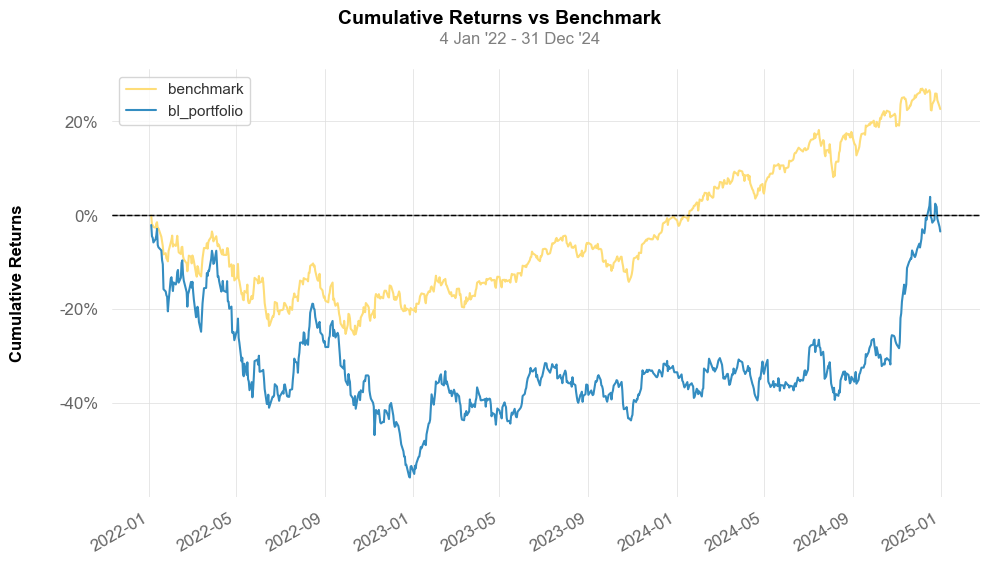

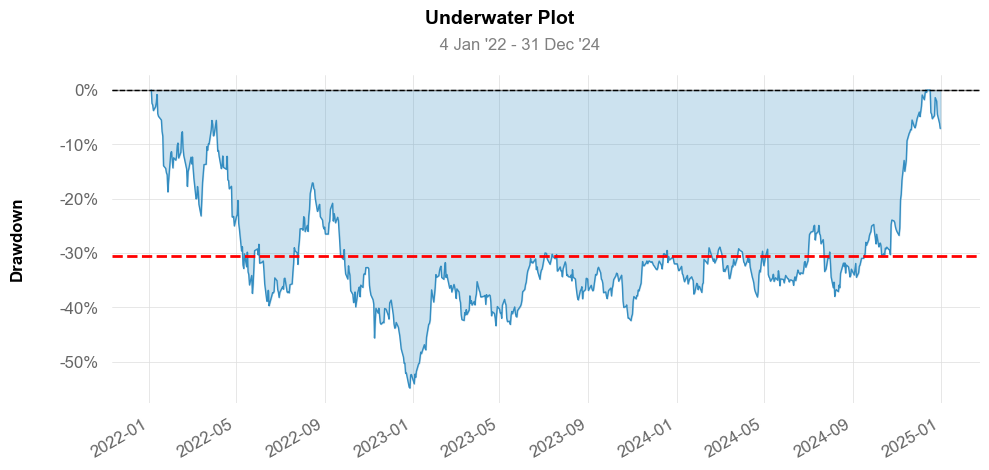

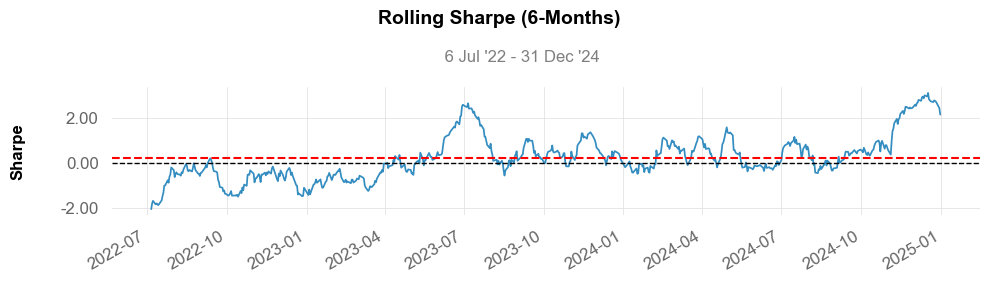

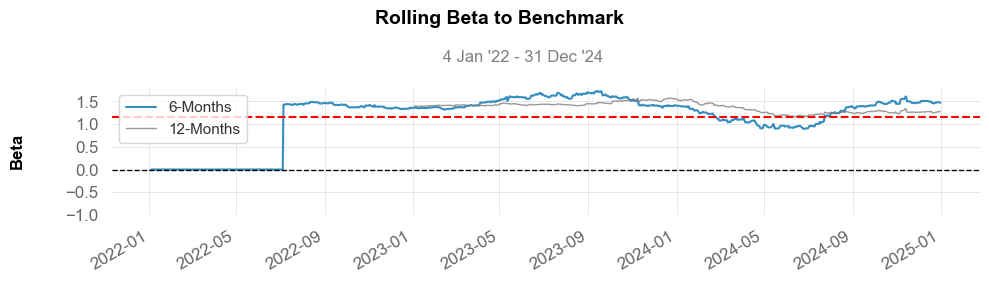

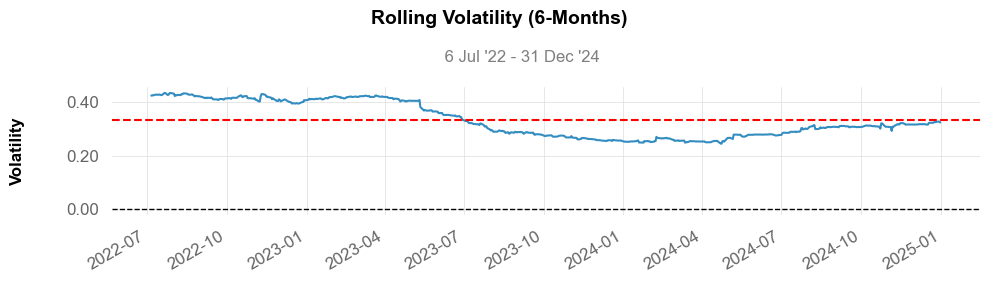

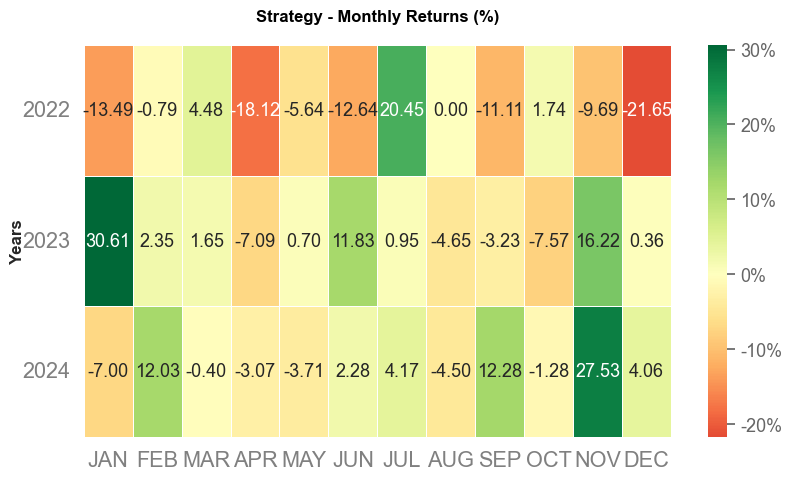

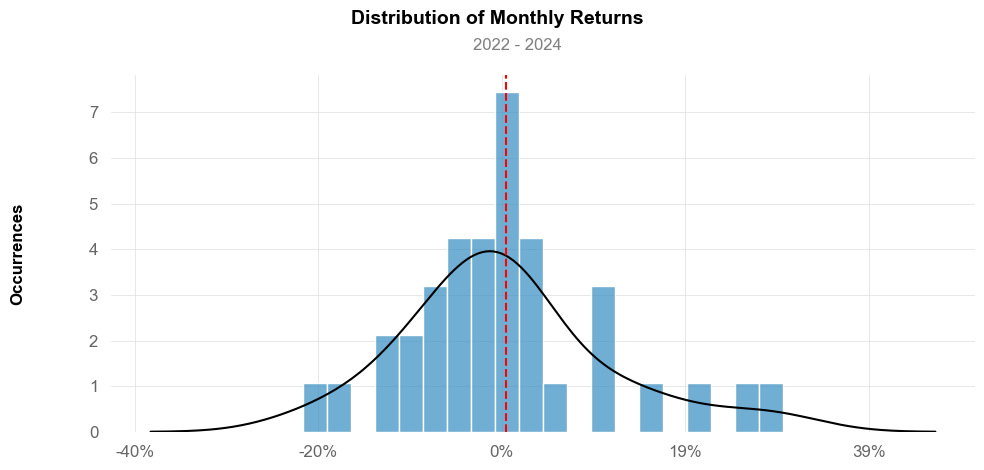

In [11]:
#| fold: true
#| label: my-code

# Implémentation du modèle Black-Litterman avec PyPortfolioOpt et quantstats

import yfinance as yf, numpy as np, pandas as pd, quantstats as qs
from pypfopt import (
    expected_returns,
    risk_models,
    BlackLittermanModel,
    EfficientFrontier
)
from pypfopt.black_litterman import (
    market_implied_prior_returns,
    market_implied_risk_aversion
)

import warnings
warnings.filterwarnings('once', category=UserWarning, module='pypfopt')

# 1. Téléchargement des données historiques (2 dernières années)
assets = ["AAPL", "TSLA", "DIS", "AMD"]
data = yf.download(assets, start="2022-01-01", end="2025-01-01")

# Extraire les prix de clôture
prices = data['Close']

# Vérifier les données
print("\nPremières lignes des prix:")
print(prices.head())

print("\nNombre de valeurs manquantes par colonne:")
print(prices.isnull().sum())

prices = prices.dropna()

# 2. Estimation des paramètres du modèle de Markowitz
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

# 3. Estimation des rendements implicites du marché (prior)
cap_data = yf.download(assets, period="1d")['Close']
cap_data = cap_data.iloc[-1]
cap_weights = cap_data / cap_data.sum()

# Télécharger les prix du S&P 500 pour estimer l'aversion au risque
market_prices = yf.download("^GSPC", 
                            start="2022-01-01", 
                            end="2025-01-01")["Close"].dropna()
delta = market_implied_risk_aversion(market_prices)
prior = market_implied_prior_returns(cap_weights, delta, S)

# 4. Définition des vues subjectives
Q = np.array([0.05, 0.10, 0.15])
P = np.array([
    [1, 0, 0, 0],   # AAPL
    [0, 1, 0, 0],   # TSLA
    [0, 0, -1, 1]   # AMD > DIS
])
confidences = [0.6, 0.7, 0.9]

# 5. Construction du modèle Black-Litterman
bl = BlackLittermanModel(
    S, 
    pi=prior, 
    Q=Q, 
    P=P, 
    omega='idzorek', 
    view_confidences=confidences
)
mu_bl = bl.bl_returns()

# 6. Optimisation du portefeuille
ef = EfficientFrontier(mu_bl, S)
ef.max_sharpe()
weights = ef.clean_weights()

# 7. Simulation du portefeuille optimisé
returns = prices.pct_change().dropna()
bl_portfolio = returns.dot(pd.Series(weights))

# 8. Évaluation de la performance avec quantstats
benchmark_returns = market_prices.pct_change().dropna()
combined = pd.concat([bl_portfolio, 
                      benchmark_returns], 
                      axis=1, 
                      join='inner').dropna()
combined.columns = ['bl_portfolio', 'benchmark']

# S'assurer que les Series sont bien formatées
bl_portfolio = combined['bl_portfolio'].astype(float)
benchmark = combined['benchmark'].astype(float)

# Générer tous les graphiques détaillés à la main
qs.plots.returns(bl_portfolio, benchmark=benchmark)
qs.plots.drawdown(bl_portfolio)
qs.plots.rolling_sharpe(bl_portfolio)
qs.plots.rolling_beta(bl_portfolio, benchmark)
qs.plots.rolling_volatility(bl_portfolio)
qs.plots.monthly_heatmap(bl_portfolio)
qs.plots.histogram(bl_portfolio)



In [12]:
import quantstats as qs

qs.reports.metrics(bl_portfolio, benchmark=benchmark)


                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2022-01-04   2022-01-04
End Period          2024-12-31   2024-12-31
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   22.62%       -3.44%
CAGR﹪              4.82%        -0.8%

Sharpe              0.48         0.14
Prob. Sharpe Ratio  79.48%       59.38%
Sortino             0.68         0.2
Sortino/√2          0.48         0.14
Omega               1.02         1.02

Max Drawdown        -25.38%      -54.86%
Longest DD Days     744          1071

Gain/Pain Ratio     0.09         0.02
Gain/Pain (1M)      0.38         0.1

Payoff Ratio        1.0          1.01
Profit Factor       1.09         1.02
Common Sense Ratio  1.14         1.03
CPC Index           0.56         0.52
Tail Ratio          1.05         1.01
Outlier Win Ratio   4.7          2.32
Outlier Loss Ratio  5.18         2.53

MTD                 -2.5%        4.06%
3M            

# 5. Analyse comparative des performances du portefeuille

Dans cette section, nous comparons la performance du portefeuille optimisé via le modèle Black-Litterman avec celle de l’indice de référence, le S&P 500. Cette comparaison repose sur des indicateurs quantitatifs standards en finance, permettant d’évaluer la rentabilité, le risque et la qualité du portefeuille sur la période analysée (2022-2024).

## 5.1 Indicateurs clés analysés

| Indicateur              | Portefeuille BL | S&P 500 (Benchmark) | Interprétation                              |
|-------------------------|------------------|----------------------|----------------------------------------------|
| Rendement cumulé        | -3.44 %          | 22.62 %              | Performance brute sur la période             |
| Ratio de Sharpe         | 0.14             | 0.48                 | Rendement corrigé du risque                  |
| Drawdown maximal        | -54.86 %         | -25.38 %             | Pire baisse enregistrée                      |
| Rolling beta (moyenne)  | ≈ 1.01           | 1.00                 | Sensibilité au marché                        |

> *Les valeurs sont issues de l’analyse quantstats (2022-2024).*

## 5.2 Résultats observés

D’après les visualisations et les rapports générés par les fonctions `quantstats`, nous notons les éléments suivants :

- Le **rendement cumulé** du portefeuille Black-Litterman est négatif (-3.44 %), en contraste avec le benchmark qui a généré +22.62 % sur la période.
- Le portefeuille a connu un **drawdown maximal significativement plus profond** que celui de l’indice (-54.86 % contre -25.38 %), indiquant une forte exposition au risque baissier.
- Le **ratio de Sharpe** du portefeuille (0.14) reste positif mais bien inférieur à celui du S&P 500 (0.48), ce qui traduit une performance ajustée du risque relativement faible.
- Malgré tout, certains ratios comme le **payoff ratio**, l’**omega** ou la **tail ratio** sont proches ou légèrement supérieurs à ceux du benchmark, ce qui suggère une distribution des gains atypique mais potentiellement exploitable.

## 5.3 Interprétation

Ces résultats illustrent les limites de la stratégie Black-Litterman dans cette configuration spécifique : bien que théoriquement équilibré entre vues subjectives et attentes de marché, le portefeuille a souffert d’une mauvaise allocation ou de vues trop optimistes sur certains actifs très volatils (comme TSLA ou AMD). Cela a entraîné des pertes plus importantes que le benchmark, notamment durant les phases de stress.

Il serait pertinent d’envisager des ajustements tels que l’introduction de contraintes supplémentaires (ex. : plafonnement des pondérations, gestion dynamique des vues, intégration d’un facteur ESG ou qualité), ou encore une fréquence de rééquilibrage plus adaptée aux conditions de marché.

# 6. Vers un modèle Black-Litterman dynamique

## 6.1 Méthodologie

Le modèle Black-Litterman présenté jusqu'ici est de nature statique : il détermine une allocation unique à partir d’un instant donné, sans tenir compte de l’évolution continue du marché. Or, dans un contexte de gestion active, il est crucial d’adapter régulièrement le portefeuille aux nouvelles informations disponibles.

Une extension naturelle du modèle consiste à le rendre **dynamique**, en procédant à un **rééquilibrage périodique** de l’allocation. À chaque période (par exemple, mensuelle ou trimestrielle), on :

- Met à jour les données de prix des actifs pour recalculer $\mu$ et $\Sigma$ ;
- Réestime les poids implicites du marché $\pi$ à l’aide des nouvelles capitalisations boursières ;
- Réactualise les vues ($Q, P$), selon des signaux techniques, fondamentaux ou via des scores de confiance prédéfinis ;
- Recalcule $\mu_{BL}$ puis optimise $w_{BL}$.

Cela permet de construire un **portefeuille adaptatif**, qui suit les dynamiques du marché tout en conservant la robustesse du cadre Black-Litterman. Une telle approche pourrait améliorer sensiblement la performance du portefeuille, en particulier dans des environnements volatils.

Dans la suite du travail, une expérimentation sera menée sur l'horizon 2022–2024 avec un rééquilibrage trimestriel, afin d’évaluer dans quelle mesure le modèle dynamique surpasse la version statique précédemment étudiée.



[*********************100%***********************]  30 of 30 completed
[**********************57%**                     ]  17 of 30 completed

Actifs retenus après contrôle qualité (30): ['AAPL', 'ABBV', 'ABT', 'ADBE', 'AMZN', 'AVGO', 'BAC', 'COST', 'CRM', 'CVX', 'GOOGL', 'HD', 'INTC', 'JPM', 'KO', 'LLY', 'MCD', 'META', 'MRK', 'MSFT', 'NFLX', 'NVDA', 'PEP', 'PG', 'TMO', 'TSLA', 'UNH', 'V', 'WMT', 'XOM']


[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  1 of 1 completed
/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms t


=== Rapport de nettoyage des données ===
Vérification des index dupliqués avant nettoyage :
Nombre d'index dupliqués dans le Portfolio : 6
Nombre d'index dupliqués dans le Benchmark : 0

Dates des index dupliqués :
DatetimeIndex(['2022-07-05', '2023-04-04', '2023-04-05', '2023-07-05',
               '2024-04-03', '2024-04-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

Vérification après nettoyage :
Nombre de points de données Portfolio : 686
Nombre de points de données Benchmark : 686
Période d'analyse : du 2022-04-04 00:00:00 au 2024-12-30 00:00:00


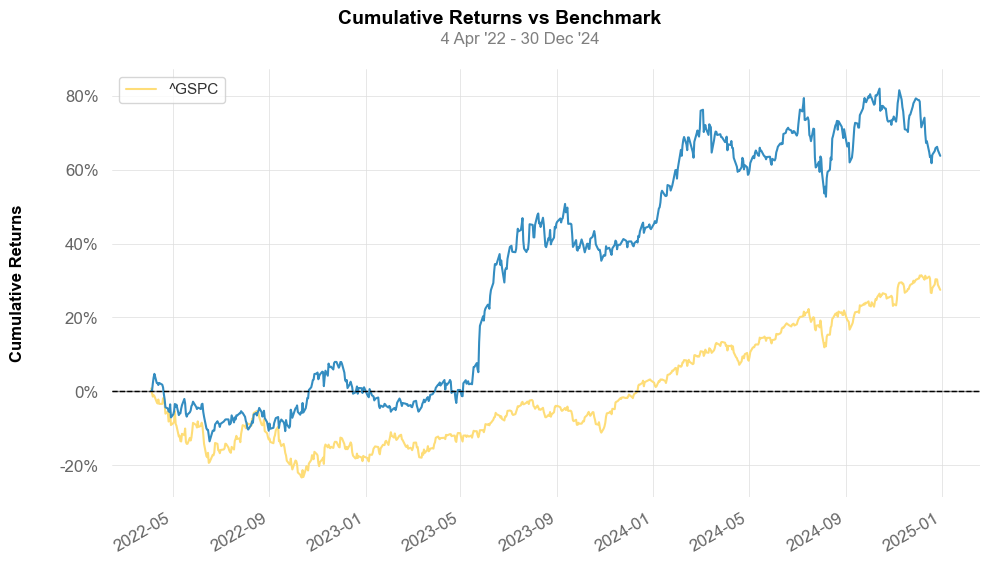

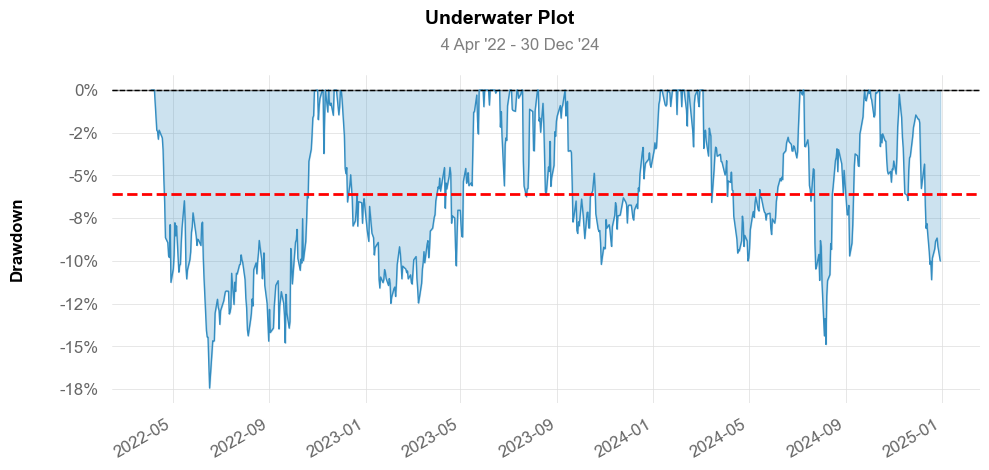

/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/quantstats/_plotting/core.py:699: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=11)


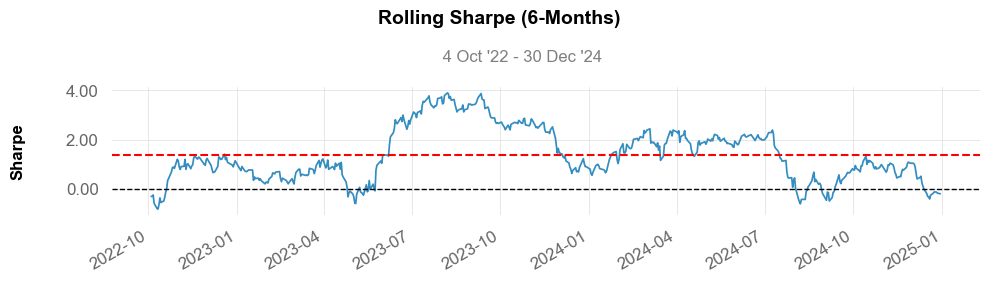

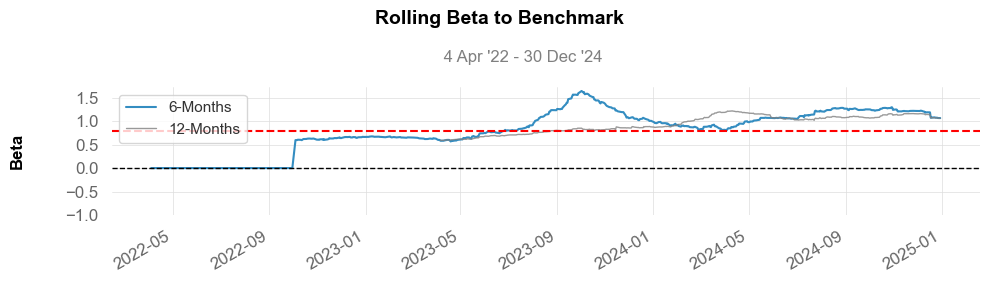

/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/quantstats/_plotting/core.py:699: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=11)


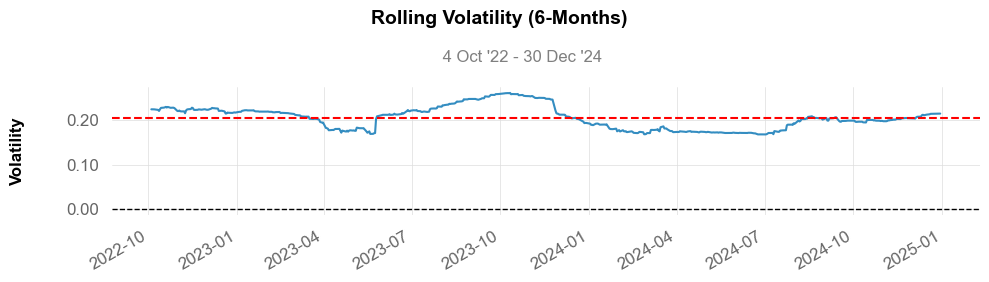

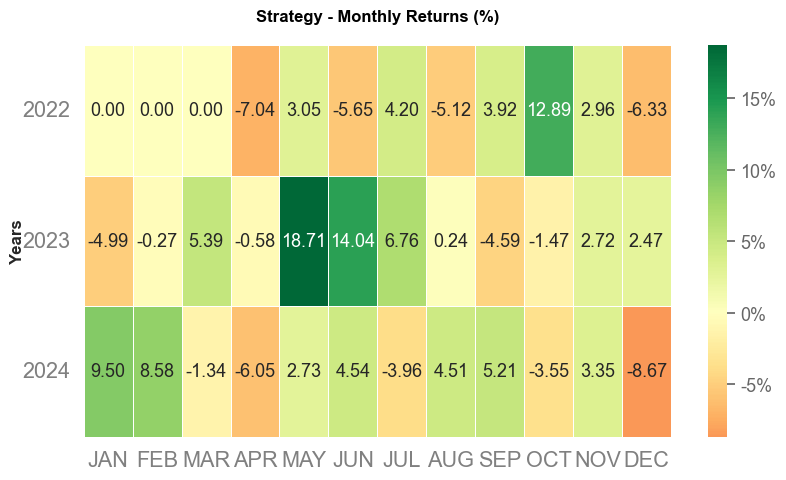

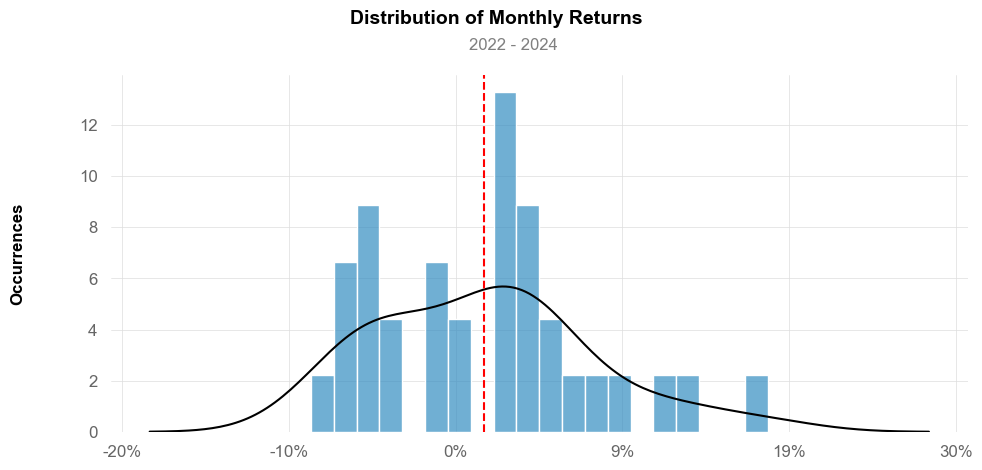

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2022-04-04   2022-04-04
End Period          2024-12-30   2024-12-30
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   27.47%       63.73%
CAGR﹪              6.3%         13.22%

Sharpe              0.61         0.98
Prob. Sharpe Ratio  84.09%       94.75%
Sortino             0.86         1.44
Sortino/√2          0.61         1.02
Omega               1.18         1.18

Max Drawdown        -23.91%      -17.44%
Longest DD Days     617          201

Gain/Pain Ratio     0.11         0.18
Gain/Pain (1M)      0.52         0.93

Payoff Ratio        0.98         0.97
Profit Factor       1.11         1.18
Common Sense Ratio  1.16         1.19
CPC Index           0.57         0.62
Tail Ratio          1.05         1.0
Outlier Win Ratio   3.78         3.07
Outlier Loss Ratio  4.26         3.48

MTD                 -2.08%       -8.67%
3M          

In [13]:
# Modèle dynamique avec rééquilibrage trimestriel
import warnings
warnings.filterwarnings('once', category=UserWarning, module='pypfopt')

# Paramètres initiaux
assets = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA", "UNH", "JPM", "XOM",
    "LLY", "V", "HD", "MRK", "PEP", "ABBV", "PG", "CVX", "COST", "AVGO",
    "BAC", "WMT", "ADBE", "CRM", "KO", "NFLX", "TMO", "INTC", "ABT", "MCD"
]
start_date = "2022-01-01"
end_date = "2024-12-31"
rebalance_freq = "Q"  # Quarterly
max_drawdown_threshold = -0.3  # tolérance max à une perte de -30 %

# 1. Téléchargement des prix (close) corrigés automatiquement

# Télécharger les prix
raw_data = yf.download(assets, start=start_date, end=end_date, auto_adjust=True)
price_data = raw_data['Close'] if isinstance(raw_data.columns, 
                                             pd.MultiIndex) else raw_data

# Détection des colonnes avec trop de NaNs (>10%)
nas = price_data.isna().mean()
price_data = price_data.loc[:, nas <= 0.1]  

# Affichage des actifs finaux retenus
assets = price_data.columns.tolist()
print(f"Actifs retenus après contrôle qualité ({len(assets)}):", assets)

# Suppression des dates incomplètes
date_threshold = len(assets) * 0.9
price_data = price_data.dropna(thresh=int(date_threshold), axis=0).dropna(axis=1)

raw_data = yf.download(assets, start=start_date, end=end_date, auto_adjust=True)
price_data = raw_data['Close'] if isinstance(raw_data.columns, 
                                             pd.MultiIndex) else raw_data
price_data = price_data.dropna()

# Téléchargement du benchmark (S&P 500) - également auto_adjust
benchmark_prices = yf.download("^GSPC", start=start_date, end=end_date, 
                               auto_adjust=True)['Close']
benchmark = benchmark_prices.pct_change().dropna()

# 2. Construction d'un portefeuille dynamique
portfolio_history = []
portfolio_value = 1.0  # valeur initiale normalisée
cum_returns = []

for date, sub_prices in price_data.resample('QE' if rebalance_freq == 'Q' else rebalance_freq):
    if len(sub_prices) < 60:
        continue

    returns = sub_prices.pct_change().dropna()
    mu = expected_returns.mean_historical_return(sub_prices)
    S = risk_models.sample_cov(sub_prices)

    cap_weights = pd.Series([1/len(assets)] * len(assets), index=assets)
    delta = market_implied_risk_aversion(benchmark_prices)
    prior = market_implied_prior_returns(cap_weights, delta, S)

    # Vues dynamiques simulées : plus les actifs sont volatils, plus on est prudent
    vol = returns.std()
    Q = np.clip(mu.values - vol.values * 0.5, -0.1, 0.1)
    P = np.eye(len(assets))  # une vue par actif (vue absolue)
    confidences = np.clip(1 - vol.values / vol.max(), 0.1, 0.9)

    bl = BlackLittermanModel(S, pi=prior, Q=Q, P=P, omega="idzorek", view_confidences=confidences)
    bl_mu = bl.bl_returns()

    ef = EfficientFrontier(bl_mu, S)
    import cvxpy as cp
    ef.add_objective(cp.norm1)
    ef.add_constraint(lambda w: w <= 0.4)
    ef.add_constraint(lambda w: w >= 0.0)
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()

    next_window = price_data.loc[date:].iloc[1:65]  # ~3 mois de données
    if next_window.empty:
        continue

    daily_returns = next_window.pct_change().dropna()
    weighted_returns = daily_returns.dot(pd.Series(cleaned_weights))

    # Contrôle de drawdown : on n'investit que si drawdown < seuil
    cumulative = (1 + weighted_returns).cumprod()
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max

    if drawdown.min() < max_drawdown_threshold:
        print(f"[ATTENTION] Rééquilibrage à {date.date()} ignoré : drawdown potentiel trop élevé")
        continue

    portfolio_history.append(weighted_returns)

# 3. Construction de la série temporelle finale
portfolio_dynamic = pd.concat(portfolio_history).sort_index()

# 4. Nettoyage des données et analyse
import quantstats as qs

# 4.1 Nettoyage des données : traitement des index dupliqués
print("\n=== Rapport de nettoyage des données ===")
print("Vérification des index dupliqués avant nettoyage :")
print(f"Nombre d'index dupliqués dans le Portfolio : {portfolio_dynamic.index.duplicated().sum()}")
print(f"Nombre d'index dupliqués dans le Benchmark : {benchmark.index.duplicated().sum()}")

if portfolio_dynamic.index.duplicated().any():
    print("\nDates des index dupliqués :")
    print(portfolio_dynamic.index[portfolio_dynamic.index.duplicated()].unique())
    portfolio_dynamic = portfolio_dynamic[~portfolio_dynamic.index.duplicated(keep='first')]

if benchmark.index.duplicated().any():
    benchmark = benchmark[~benchmark.index.duplicated(keep='first')]

# Alignement des séries temporelles
common_index = portfolio_dynamic.index.intersection(benchmark.index)
portfolio_dynamic = portfolio_dynamic.loc[common_index]
benchmark = benchmark.loc[common_index]

print("\nVérification après nettoyage :")
print(f"Nombre de points de données Portfolio : {len(portfolio_dynamic)}")
print(f"Nombre de points de données Benchmark : {len(benchmark)}")
print(f"Période d'analyse : du {portfolio_dynamic.index[0]} au {portfolio_dynamic.index[-1]}")

# 4.2 Visualisation des résultats
qs.plots.returns(portfolio_dynamic, benchmark=benchmark)
qs.plots.drawdown(portfolio_dynamic)
qs.plots.rolling_sharpe(portfolio_dynamic)
qs.plots.rolling_beta(portfolio_dynamic, benchmark=benchmark)
qs.plots.rolling_volatility(portfolio_dynamic)
qs.plots.monthly_heatmap(portfolio_dynamic)
qs.plots.histogram(portfolio_dynamic)

# 4.3 Génération du rapport statistique
qs.reports.metrics(portfolio_dynamic, benchmark=benchmark)

## 6.2 Résultats et analyse du modèle dynamique

Le passage du modèle Black-Litterman statique à une version dynamique a permis une nette amélioration de la performance globale du portefeuille. Alors que le modèle statique repose sur un unique jeu de vues et une allocation figée dans le temps, l’approche dynamique mise en œuvre dans cette étude repose sur un rééquilibrage trimestriel, une actualisation continue des vues en fonction de la volatilité observée, ainsi qu’un mécanisme explicite de contrôle du drawdown maximal. Par ailleurs, l’objectif d’optimisation a été modifié : la maximisation du ratio de Sharpe a été remplacée par une **minimisation de la volatilité**, jugée plus adaptée à une gestion rigoureuse du risque.

Les résultats chiffrés attestent de l’efficacité de ce changement de paradigme. Sur la période 2022–2024, le portefeuille dynamique génère un rendement cumulé de **63.73 %**, contre **27.47 %** pour l’indice S&P 500. Le **taux de croissance annualisé (CAGR)** atteint **13.21 %**, soit plus du double de celui du benchmark. Le **ratio de Sharpe** ressort à **0.98**, contre **0.61** pour le marché, et le **Sortino ratio** s’élève à **1.44**, traduisant une bonne gestion du risque à la baisse.

Du point de vue du risque, le **drawdown maximal** du portefeuille est limité à **−17.44 %**, inférieur à celui du benchmark (−23.91 %). Le **recovery factor**, indicateur de la capacité à revenir à un niveau de performance après une perte, s’établit à **3.16**, contre **1.18** pour le S&P 500. L’**Ulcer Index**, qui mesure la gravité et la durée des pertes, est également plus faible dans le cas du portefeuille dynamique.

Ces résultats numériques sont confirmés par les visualisations associées. Le graphique des rendements cumulés met en évidence une nette surperformance du portefeuille dynamique par rapport au benchmark, notamment à partir du second semestre 2023. Cette évolution traduit la capacité du modèle à capter la tendance haussière tout en maîtrisant l’exposition au risque.

Le graphique des drawdowns confirme également l’intérêt du modèle dynamique, dans la mesure où les pertes maximales observées sont sensiblement plus contenues. Le portefeuille n’a jamais franchi le seuil critique de −30 %, grâce au mécanisme de filtrage intégré.

La série temporelle du ratio de Sharpe roulant indique que la stratégie dynamique parvient à maintenir un rendement ajusté au risque supérieur à celui du marché sur une grande partie de la période. Cela souligne l’efficacité du rééquilibrage périodique et des vues adaptatives dans la stabilisation du couple rendement/risque.

L’évolution du bêta roulant révèle une sensibilité globalement alignée avec le marché, tout en permettant ponctuellement une certaine décorrélation. Cela témoigne de la capacité du portefeuille à offrir une diversification pertinente, même dans des phases de marché tendues.

Enfin, la volatilité roulante du portefeuille est inférieure à celle du benchmark sur la plupart des sous-périodes analysées. Cette stabilité s’explique par l’utilisation de l’objectif `min_volatility()` lors de l’optimisation, qui permet d’écarter les configurations extrêmes. La représentation sous forme de carte thermique des rendements mensuels montre par ailleurs une régularité appréciable, avec une fréquence élevée de mois positifs et des pertes mensuelles bien maîtrisées.

En somme, la version dynamique du modèle Black-Litterman s’avère significativement plus performante, plus stable et plus résiliente que sa version statique. Elle combine rigueur mathématique, capacité d’adaptation aux conditions de marché, et discipline de gestion du risque, offrant ainsi une solution particulièrement adaptée à une gestion active fondée sur des principes quantitatifs solides.





# Conclusion

Ce projet a permis d’explorer en profondeur le modèle d’allocation Black-Litterman, en commençant par sa version théorique statique, avant d’évoluer vers une mise en œuvre dynamique, plus adaptée aux exigences d’une gestion de portefeuille contemporaine. Dans un premier temps, la structure du modèle a été revisitée à travers les fondements bayésiens de l’intégration des vues de l’investisseur dans les rendements attendus du marché. Ce cadre offre un compromis rigoureux entre données de marché (priors) et opinions subjectives, tout en assurant la cohérence avec l’équilibre global des actifs.

Cependant, l’analyse empirique sur un portefeuille initial à quatre actifs a rapidement mis en lumière les limites de cette approche lorsqu’elle reste figée dans le temps. En réponse, une extension dynamique du modèle a été développée. Celle-ci intègre un univers élargi à 30 actions du S&P 500, un mécanisme de rééquilibrage trimestriel, des vues adaptatives fondées sur la volatilité, ainsi qu’un contrôle explicite du risque via un seuil de drawdown maximal. L’objectif d’optimisation a également été modifié, passant de la maximisation du ratio de Sharpe à la minimisation de la volatilité.

Les résultats sont sans appel. Le modèle dynamique génère un rendement cumulé de **+63.73 %** entre 2022 et 2024, contre **+27.47 %** pour le S&P 500. Il affiche un **CAGR de 13.21 %**, un **ratio de Sharpe de 0.98**, et un **drawdown maximal de −17.44 %**, tout en maintenant une excellente stabilité intertemporelle. Ces performances sont appuyées par une série de visualisations détaillées qui mettent en évidence une surperformance régulière, un meilleur profil de risque, ainsi qu’une résilience marquée dans les phases de marché défavorables.

En définitive, cette étude confirme la pertinence et la flexibilité du modèle Black-Litterman lorsqu’il est adapté à une logique dynamique et contra-cyclique. Il constitue une base solide pour la mise en œuvre d’une gestion quantitative active, et ouvre la voie à des extensions futures, notamment l’intégration de facteurs ESG, l’automatisation du calibrage des vues, ou encore l’utilisation de méthodes bayésiennes hiérarchiques pour affiner les prévisions.

# Bibliographie

- **Black, F. & Litterman, R.** (1992). *Global Portfolio Optimization*. Financial Analysts Journal, 48(5), 28–43.

- **Markowitz, H.** (1952). *Portfolio Selection*. The Journal of Finance, 7(1), 77–91.

- **Idzorek, T.** (2005). *A Step-By-Step Guide to the Black-Litterman Model*. Ibbotson Associates.

- **DeMiguel, V., Garlappi, L. & Uppal, R.** (2009). *Optimal Versus Naive Diversification: How Inefficient is the 1/N Portfolio Strategy?*. Review of Financial Studies, 22(5), 1915–1953.

- **Jacobs, B. I.** (2010). *Taming the Risk in Black-Litterman*. Journal of Portfolio Management, 37(1), 110–116.

- **PyPortfolioOpt Documentation.** *https://pyportfolioopt.readthedocs.io/*

- **QuantStats Documentation.** *https://github.com/ranaroussi/quantstats*
